In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns
plt.style.use("https://raw.githubusercontent.com/FabianSchubert/mpl_style/main/custom_style.mplstyle")

In [8]:
results_files = [f for f in listdir("./results_data/") if isfile(join("./results_data/", f))]

for k, file in enumerate(results_files):
    _data = np.load(join("./results_data/", file))
    if k==0:
        df_results = pd.DataFrame({'train time': _data["train_time"],
                                    'false positive': _data["false_pos"],
                                    'false negative': _data["false_neg"],
                                    "error": _data["err"],
                                    "event based": _data["event_based"]}, index=[k])
    else:
        df_results = pd.concat([df_results, pd.DataFrame({'train time': _data["train_time"],
                                    'false positive': _data["false_pos"],
                                    'false negative': _data["false_neg"],
                                    "error": _data["err"],
                                    "event based": _data["event_based"]}, index=[k])], ignore_index=True)

In [9]:
df_results

,train time,false positive,false negative,error,event based
0,50.18293,0.237624,0.02,0.163265,False


In [22]:
df_results[df_results["event based"]].mean()

train time       NaN
false positive   NaN
false negative   NaN
error            NaN
event based      NaN
dtype: float64

In [4]:

df_results[df_results["event based"] == False].mean()

train time        108.333106
false positive      0.194030
false negative      0.065000
error               0.085561
event based         0.000000
dtype: float64

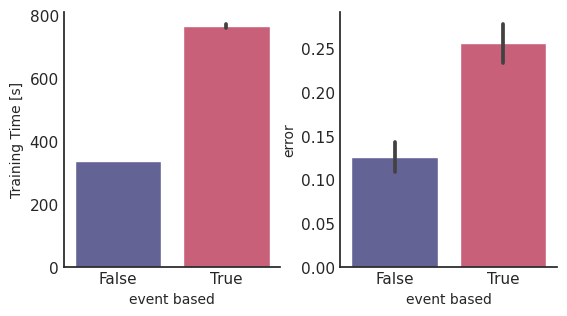

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(5.5,3))

sns.barplot(data=df_results, x="event based", y="train time", ax=ax[0])
sns.barplot(data=df_results, x="event based", y="error", ax=ax[1])

ax[0].set_ylabel("Training Time [s]")
ax[1].set_ylabel("Test Error")

fig.tight_layout(pad=0.1)

plt.show()